In [1]:
import cv2
import matplotlib.pyplot as plt
from pytorchyolo import detect, models
import os
import numpy as np
import matplotlib.patches as patches
import json

# Load the YOLO model
model = models.load_model(
  "/homes/e34960/GenPatch/Naturalistic-Adversarial-Patch/PyTorchYOLOv3/config/yolov3-tiny.cfg",
  "/homes/e34960/GenPatch/Naturalistic-Adversarial-Patch/PyTorchYOLOv3/weights/yolov3-tiny.weights")

/homes/e34960/anaconda3/envs/patchdiff/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
annotations_file = "/project/trinity/datasets/COCO/coco_2014.names"
annotations_coco = []

with open(annotations_file, "r") as file:
    for line in file:
        # Remove any leading or trailing whitespace and add the word to the list
        annotations_coco.append(line.strip())

# Print the array to see the result
print(annotations_coco)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


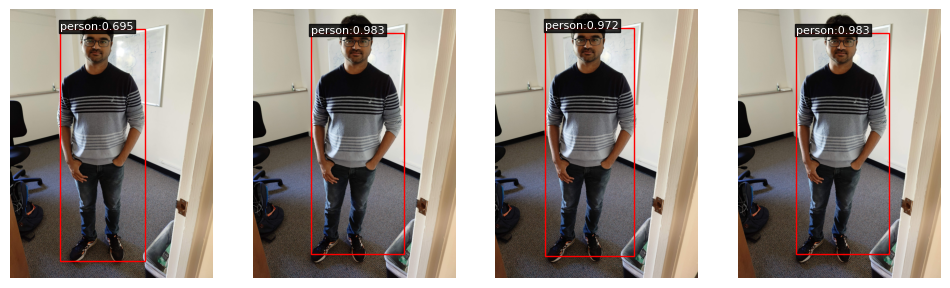

In [3]:
benign_imgs_folder = "./PhysicalAttack/Person/Benign/"
benign_imgs = os.listdir(benign_imgs_folder)

fig, axes = plt.subplots(1, len(benign_imgs), figsize=(12, 20))

for i in range(len(benign_imgs)):
    img_benign = cv2.imread(os.path.join(benign_imgs_folder, benign_imgs[i]))
    h, w, _ = img_benign.shape
    img_benign = cv2.resize(img_benign, (w//4, h//4))
    img_benign = cv2.cvtColor(img_benign, cv2.COLOR_BGR2RGB)

    benign_boxes = detect.detect_image(model, img_benign)
    # print(benign_boxes[j][5])
    axes[i].imshow(img_benign)
    axes[i].axis('off')

    for j in range(benign_boxes.shape[0]):
        rectangle = patches.Rectangle((benign_boxes[j][0], benign_boxes[j][1]), benign_boxes[j][2] - benign_boxes[j][0], benign_boxes[j][3] - benign_boxes[j][1], linewidth=1, edgecolor='r', facecolor='none')
        # cv2.putText(imgs[i], text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        axes[i].add_patch(rectangle)
        text_label = "{}:{:.3f}".format(annotations_coco[int(benign_boxes[j][5])], benign_boxes[j][4])
        axes[i].text(benign_boxes[j][0], benign_boxes[j][1], text_label, fontsize=8, bbox=dict(facecolor='black', alpha=0.8, pad=1), color='white')



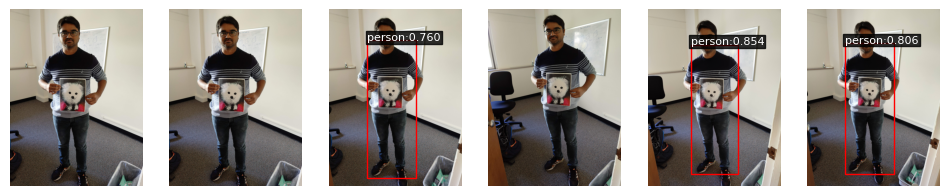

In [4]:
adv_imgs_folder = "./PhysicalAttack/Person/Adversarial/"
adv_imgs = os.listdir(adv_imgs_folder)

fig, axes = plt.subplots(1, len(adv_imgs), figsize=(12, 20))

for i in range(len(adv_imgs)):
    img_adv = cv2.imread(os.path.join(adv_imgs_folder, adv_imgs[i]))
    h, w, _ = img_adv.shape
    img_adv = cv2.resize(img_adv, (w//4, h//4))
    img_adv = cv2.cvtColor(img_adv, cv2.COLOR_BGR2RGB)

    adv_boxes = detect.detect_image(model, img_adv)

    axes[i].imshow(img_adv)
    axes[i].axis('off')

    for j in range(adv_boxes.shape[0]):
        rectangle = patches.Rectangle((adv_boxes[j][0], adv_boxes[j][1]), adv_boxes[j][2] - adv_boxes[j][0], adv_boxes[j][3] - adv_boxes[j][1], linewidth=1, edgecolor='r', facecolor='none')
        # cv2.putText(imgs[i], text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        axes[i].add_patch(rectangle)
        text_label = "{}:{:.3f}".format(annotations_coco[int(adv_boxes[j][5])], adv_boxes[j][4])
        axes[i].text(adv_boxes[j][0], adv_boxes[j][1], text_label, fontsize=8, bbox=dict(facecolor='black', alpha=0.8, pad=1), color='white')



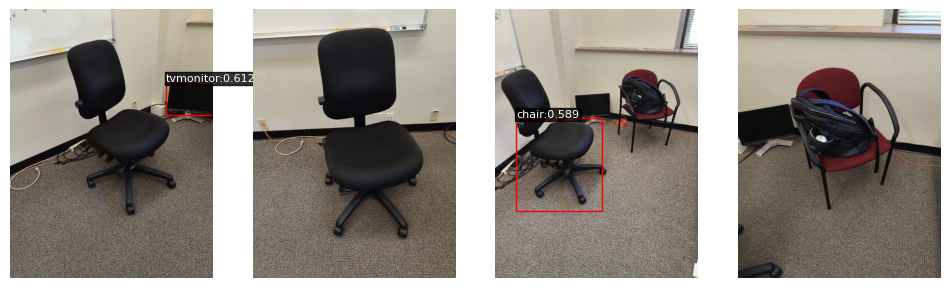

In [5]:
benign_imgs_folder = "./PhysicalAttack/Chair/Benign/"
benign_imgs = os.listdir(benign_imgs_folder)

fig, axes = plt.subplots(1, len(benign_imgs), figsize=(12, 20))

for i in range(len(benign_imgs)):
    img_benign = cv2.imread(os.path.join(benign_imgs_folder, benign_imgs[i]))
    h, w, _ = img_benign.shape
    img_benign = cv2.resize(img_benign, (w//4, h//4))
    img_benign = cv2.cvtColor(img_benign, cv2.COLOR_BGR2RGB)

    benign_boxes = detect.detect_image(model, img_benign)

    axes[i].imshow(img_benign)
    axes[i].axis('off')

    for j in range(benign_boxes.shape[0]):
        rectangle = patches.Rectangle((benign_boxes[j][0], benign_boxes[j][1]), benign_boxes[j][2] - benign_boxes[j][0], benign_boxes[j][3] - benign_boxes[j][1], linewidth=1, edgecolor='r', facecolor='none')
        # cv2.putText(imgs[i], text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        axes[i].add_patch(rectangle)
        # print(benign_boxes[j][5])
        text_label = "{}:{:.3f}".format(annotations_coco[int(benign_boxes[j][5])], benign_boxes[j][4])
        axes[i].text(benign_boxes[j][0], benign_boxes[j][1], text_label, fontsize=8, bbox=dict(facecolor='black', alpha=0.8, pad=1), color='white')


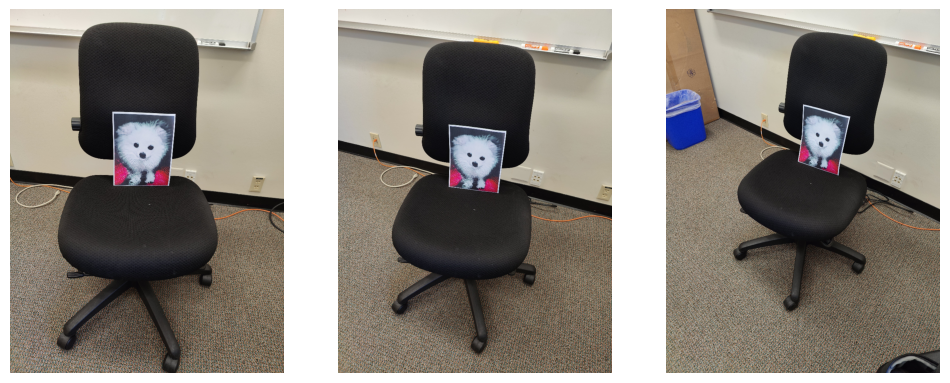

In [6]:
benign_imgs_folder = "./PhysicalAttack/Chair/Adversarial/"
benign_imgs = os.listdir(benign_imgs_folder)

fig, axes = plt.subplots(1, len(benign_imgs), figsize=(12, 20))

for i in range(len(benign_imgs)):
    img_benign = cv2.imread(os.path.join(benign_imgs_folder, benign_imgs[i]))
    h, w, _ = img_benign.shape
    img_benign = cv2.resize(img_benign, (w//4, h//4))
    img_benign = cv2.cvtColor(img_benign, cv2.COLOR_BGR2RGB)

    benign_boxes = detect.detect_image(model, img_benign)

    axes[i].imshow(img_benign)
    axes[i].axis('off')

    for j in range(benign_boxes.shape[0]):
        rectangle = patches.Rectangle((benign_boxes[j][0], benign_boxes[j][1]), benign_boxes[j][2] - benign_boxes[j][0], benign_boxes[j][3] - benign_boxes[j][1], linewidth=1, edgecolor='r', facecolor='none')
        # cv2.putText(imgs[i], text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        axes[i].add_patch(rectangle)
        text_label = "{}:{:.3f}".format(annotations_coco[int(benign_boxes[j][5])], benign_boxes[j][4])
        axes[i].text(benign_boxes[j][0], benign_boxes[j][1], text_label, fontsize=8, bbox=dict(facecolor='black', alpha=0.8, pad=1), color='white')

